# Imports

In [1]:
from pyeda.inter import *
import copy
import math
from IPython.display import SVG
from ipython_magic.gvmagic import *

from game.generator import random_game
from game.generator_sr import random_game_sr
from game.visualizer import graphgame_viz
from game import timer

from psolvers import psolB,psolC,psolQ,buchi_solver

from gen.generator_gen import random_game_gen
from gen.visualizer_gen import graphgame_viz_gen
from gen.ext_visualizer_gen import graphgame_viz_gen_ext
from gen.classical import classical_gen, classical_with_psolver
from psolvers_gen import psolB_gen, psolC_gen, psolQ_gen

import buchi
import zielonka

# Parity games

## Init game

In [4]:
rgame = random_game(200,5,2,10)
phi_0 = rgame.phi_0
phi_1 = rgame.phi_1
tau = rgame.tau
gamma = rgame.gamma

g_vars = rgame.g_vars
bis_vars = rgame.bis_vars
mapping_bis = rgame.mapping_bis


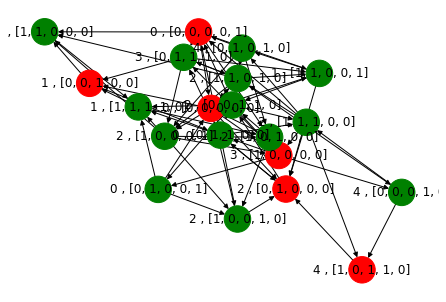

In [9]:
graphgame_viz(rgame)

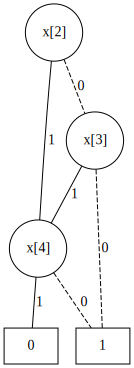

In [62]:
data = run_graphviz((phi_0 | phi_1).to_dot())
SVG(data)

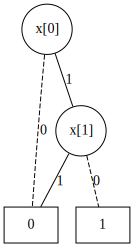

In [7]:
data = run_graphviz(gamma[0].to_dot())
SVG(data)

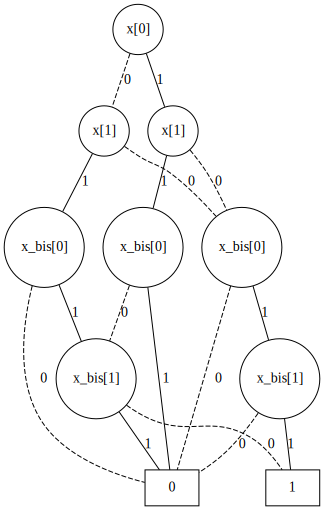

In [8]:
data = run_graphviz(tau.to_dot())
SVG(data)

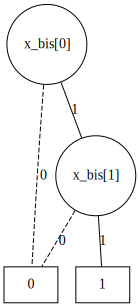

In [3]:
test = tau.restrict({g_vars[0]:0, g_vars[1]:0})
data = run_graphviz(test.to_dot())
SVG(data)

## Initialisation du jeu (représentation alternative)

In [24]:
rgame = game.generator_sr.random_game_sr(5,2,1,3)

phi_0 = rgame.phi_0
phi_1 = rgame.phi_1
tau = rgame.tau

g_vars = rgame.g_vars
bis_vars = rgame.bis_vars
mapping_bis = rgame.mapping_bis

## Zielonka

In [5]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_ziel, win_1_ziel) = zielonka.zielonka(g_copy)
  
print("L'execution a pris " + str(chrono.interval) + " secondes")

AH
AH
AH
L'execution a pris 9.536535129000185 secondes


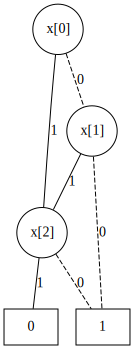

In [20]:
data = run_graphviz(win_0_ziel.to_dot())
SVG(data)

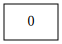

In [21]:
data = run_graphviz(win_1_ziel.to_dot())
SVG(data)

## Zielonka with partial solver

### Buchi solver

In [6]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_buchi, win_1_buchi) = zielonka.ziel_with_psolver(g_copy,buchi_solver.buchi_solver)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 16.297108515000218 secondes


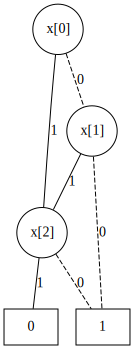

In [8]:
data = run_graphviz(win_0_buchi.to_dot())
SVG(data)

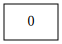

In [9]:
data = run_graphviz(win_1_buchi.to_dot())
SVG(data)

### PsolB

In [17]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_psolB, win_1_psolB) = zielonka.ziel_with_psolver(g_copy,psolB.psolB)
   
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 1.5344590320000862 secondes


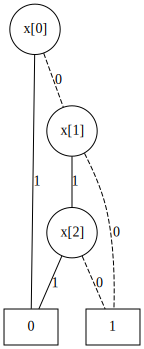

In [38]:
data = run_graphviz(win_0.to_dot())
SVG(data)

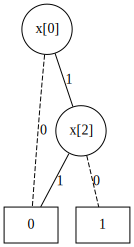

In [39]:
data = run_graphviz(win_1.to_dot())
SVG(data)

### PsolC

In [18]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_psolC, win_1_psolC) = zielonka.ziel_with_psolver(g_copy,psolC.psolC)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 16.430058907000785 secondes


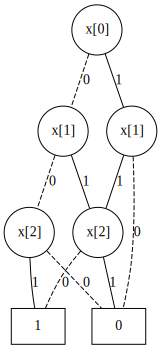

In [42]:
data = run_graphviz(win_0.to_dot())
SVG(data)

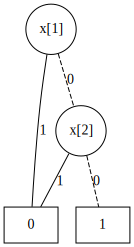

In [43]:
data = run_graphviz(win_1.to_dot())
SVG(data)

### PsolQ

In [19]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    (win_0_psolQ, win_1_psolQ) = zielonka.ziel_with_psolver(g_copy,psolQ.psolQ)
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 1.8368840279999858 secondes


## Check winning regions

In [20]:
print(win_0_ziel is win_0_buchi)
print(win_0_ziel is win_0_psolB)
print(win_0_ziel is win_0_psolC)
print(win_0_ziel is win_0_psolQ)
print(win_1_ziel is win_1_buchi)
print(win_1_ziel is win_1_psolB)
print(win_1_ziel is win_1_psolC)
print(win_1_ziel is win_1_psolQ)

True
True
True
True
True
True
True
True


# Generalized parity games

## Init game

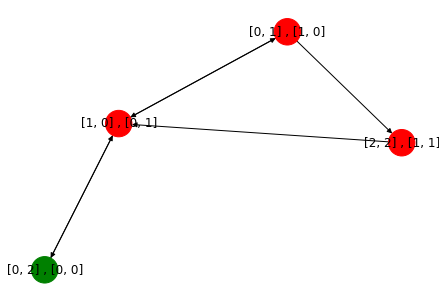

In [294]:
graphgame_viz_gen(rgame)

## Classical

In [307]:
rgame = random_game_gen(8,[2,2],1,3)
phi_0 = rgame.phi_0
phi_1 = rgame.phi_1
tau = rgame.tau
gamma = rgame.gamma

g_vars = rgame.g_vars
bis_vars = rgame.bis_vars
mapping_bis = rgame.mapping_bis

In [308]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_class,win_1_class = classical_gen(g_copy)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

L'execution a pris 0.03942030000325758 secondes


In [309]:
print(bdd2expr(win_0_class))
print(bdd2expr(win_1_class))

Or(And(~x[0], ~x[1]), And(~x[0], x[1], ~x[2]), And(x[0], ~x[1]), And(x[0], x[1], x[2]))
Or(And(~x[0], x[1], x[2]), And(x[0], x[1], ~x[2]))


In [318]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_psolQ,win_1_psolQ = classical_with_psolver(g_copy, psolQ_gen)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

False
False
L'execution a pris 0.11096317199553596 secondes


In [319]:
print(bdd2expr(win_0_psolQ))
print(bdd2expr(win_1_psolQ))

Or(And(~x[0], ~x[1]), And(~x[0], x[1], ~x[2]), And(x[0], ~x[1]), And(x[0], x[1], x[2]))
Or(And(~x[0], x[1], x[2]), And(x[0], x[1], ~x[2]))


In [317]:
from copy import copy

from attractors import attractors
from pyeda.inter import *
from itertools import product

def psolQ_gen(g):
    min_even_prio = [[] for _ in range(g.k)]


    for prio_f_index in range(g.k):
        if g.p[prio_f_index] % 2 == 1:
            init_prio = g.p[prio_f_index]
        else:
            init_prio = g.p[prio_f_index] - 1
        for min_prio in range(init_prio, -1, -2):
            w = lay_ep(g, min_prio, prio_f_index)
            if not w.is_zero():
                x = attractors.attractor(g, 1, w)
                ind_game = g.induced_game(~x)
                (z0, z1) = psolQ_gen(ind_game)
                return z0, z1 | x

            
    for prio_f_index in range(g.k):
        if g.p[prio_f_index] % 2 == 0:
            init_prio = g.p[prio_f_index]
        else:
            init_prio = g.p[prio_f_index] - 1
        for curr_prio in range(init_prio, -1, -2):
            min_even_prio[prio_f_index].append(curr_prio)
    all_combinations = product(*min_even_prio)               
    em_vars_n = g.k
    g.em_vars = bddvars('n', (0, em_vars_n))
    g.em_vars_bis = bddvars('n_bis', (0, em_vars_n))
    em_mapping = {}
    for prio_f_index in range(g.k):
        em_mapping[g.em_vars[prio_f_index]] = g.em_vars_bis[prio_f_index]
    tot_mapping = g.mapping_bis
    tot_mapping.update(em_mapping)
 
    for comb in all_combinations:
        w = lay_ep_full(g, comb)
        if not w.is_zero():
            x = attractors.attractor(g,0,w)
            ind_game = g.induced_game(~x)
            (z0, z1) = psolQ_gen(ind_game)
            return z0 | x, z1

    return expr2bdd(expr(False)), expr2bdd(expr(False))


def lay_ep(g, min_prio, c_prio_f):
    f_old = g.sup_prio_expr_odd(min_prio, c_prio_f)
    while True:
        lay_attr_f = lay_attr(g, min_prio, f_old, c_prio_f )
        f = f_old & lay_attr_f
        if f is f_old:
            break
        f_old = f
    return f


def lay_ep_full(g, q):
    max_prios = []
    for c_prio in range(g.k):
        if g.p[c_prio] % 2 == 1:
            max_prios.append(g.p[c_prio] - 1)
        else:
            max_prios.append(g.p[c_prio])
    u = g.sup_all_prio_even(q)
    return lay_attr_full(g, q, u, max_prios)


def compute_tau_ext(g, min_prios):
    res_expr = g.tau

    for prio_f_index in range(g.k):
        # active in prec
        active_prio_1 = g.em_vars[prio_f_index]
        # active in current node
        active_prio_2 = g.sup_prio_expr(min_prios[prio_f_index], prio_f_index).compose(g.mapping_bis)
        active_prio = active_prio_1 | active_prio_2

        res_expr = res_expr & (active_prio & g.em_vars_bis[prio_f_index] | ~active_prio & ~g.em_vars_bis[prio_f_index])

    return res_expr


def lay_attr(g, min_prio, u, c_prio):
    if g.p[c_prio] % 2 == 0:
        init_prio = g.p[c_prio] + 1
    else:
        init_prio = g.p[c_prio] + 2

    b = expr2bdd(expr(False))
    for curr_prio in range(init_prio, min_prio - 1, - 2):
        u_p = u & g.sup_prio_expr(curr_prio, c_prio)
        u_p_bis = g.sup_prio_expr_even(curr_prio + 1, c_prio)
        p_safe_attr = p_safe_attractor(g, 1, u_p | b, u_p_bis & ~b)
        b = b | p_safe_attr
    return b


def lay_attr_full(g, q, u, max_prios):
    p = copy(max_prios)
    p_changed = True
    c = expr2bdd(expr(False))
    b = expr2bdd(expr(False))
    while p_changed:
        tau_e = compute_tau_ext(g, p)
        t = u
        for prio_f_index in range(g.k):
            t = t & g.em_vars[prio_f_index]
        t_bis = g.sup_one_prio_odd(max_prios)

        b = p_safe_attractor_full(g, 0, tau_e, t | c, t_bis & ~c)

        p_changed = False
        for c_prio in range(g.k):
            if p[c_prio] - 2 <= q[c_prio]:
                new_value = q[c_prio]
            else:
                new_value = p[c_prio] - 2
            if new_value != p[c_prio]:
                p_changed = True
            p[c_prio] = new_value
        new_c = c | b
        c = new_c
    return b.smoothing(g.em_vars)


def p_safe_attractor_full(g, i, tau_e, u, avoid):
    f_1 = (tau_e & u.compose(g.mapping_bis)) & ~avoid
    f_1 = f_1.smoothing(g.bis_vars + g.em_vars_bis)

    f_2 = tau_e & (~u).compose(g.mapping_bis)
    f_2 = (~f_2.smoothing(g.bis_vars + g.em_vars_bis)) & ~avoid
    if i == 0:
        f_1 = g.phi_0 & f_1
        f_2 = g.phi_1 & f_2
    else:
        f_1 = g.phi_1 & f_1
        f_2 = g.phi_0 & f_2

    attr_old = f_1 | f_2
    while True:
        f_1 = (tau_e & attr_old.compose(g.mapping_bis)) & ~avoid
        f_1 = f_1.smoothing(g.bis_vars + g.em_vars_bis)

        f_2 = g.tau & (~attr_old).compose(g.mapping_bis)
        f_2 = (~f_2.smoothing(g.bis_vars + g.em_vars_bis)) & ~avoid
        if i == 0:
            f_1 = g.phi_0 & f_1
            f_2 = g.phi_1 & f_2
        else:
            f_1 = g.phi_1 & f_1
            f_2 = g.phi_0 & f_2

        attr_new = attr_old | f_1 | f_2
        if attr_new is attr_old:
            break
        attr_old = attr_new

    return attr_old

In [255]:
testgame = random_game_gen(4,[1,1],1,2)

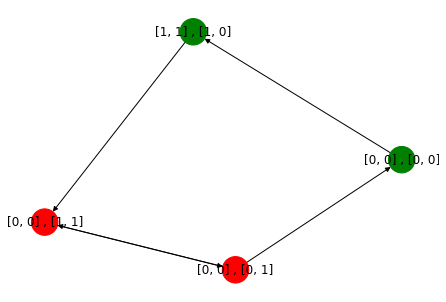

In [256]:
graphgame_viz_gen(testgame)

In [257]:
print(bdd2expr(p_safe_attractor(testgame, 1, testgame.q_vars[0] & testgame.q_vars[1], ~testgame.q_vars[0])))

And(x[0], ~x[1])


## PsolB

In [150]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_psolB,win_1_psolB = classical_with_psolver(g_copy, psolB_gen.psolB_gen)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

TypeError: unsupported operand type(s) for %: 'BinaryDecisionDiagram' and 'int'

In [6]:
print(win_0_class is win_0_psolB)
print(win_1_class is win_1_psolB)

True
True


## PsolC

In [7]:
chrono = timer.Timer(verbose=False)
g_copy = rgame.induced_game(rgame.phi_0 | rgame.phi_1)
with chrono:
    win_0_psolC,win_1_psolC = classical_with_psolver(g_copy, psolC_gen.psolC_gen)
    
print("L'execution a pris " + str(chrono.interval) + " secondes")

True
False
L'execution a pris 0.024019482999392494 secondes


In [8]:
print(win_0_class is win_0_psolC)
print(win_1_class is win_1_psolC)

True
True


## PsolQ